**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Procesamiento del Lenguaje Natural** 

***
Datos del alumno (Nombre y Apellidos):

Fecha:
***

<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Trabajo: Named-Entity Recognition</span>

**Objetivos** 

Con esta actividad se tratará de que el alumno se familiarice con el manejo de la librería spacy, así como con los conceptos básicos de manejo de las técnicas NER

**Descripción**

En esta actividad debes procesar de forma automática un texto en lenguaje natural para detectar características básicas en el mismo, y para identificar y etiquetar las ocurrencias de conceptos como localización, moneda, empresas, etc.

En la primera parte del ejercicio se proporciona un código fuente a través del cual se lee un archivo de texto y se realiza un preprocesado del mismo. En esta parte el alumno tan sólo debe ejecutar y entender el código proporcionado.

En la segunda parte del ejercicio se plantean una serie de preguntas que deben ser respondidas por el alumno. Cada pregunta deberá responderse con un fragmento de código fuente que esté acompañado de la explicación correspondiente. Para elaborar el código solicitado, el alumno deberá visitar la documentación de la librería spacy, cuyos enlaces se proporcionarán donde corresponda.

# Parte 1: carga y preprocesamiento del texto a analizar

Observa las diferentes librerías que se están importando.

In [2]:
import pathlib
import spacy
import pandas as pd
from spacy import displacy
import csv
import es_core_news_md

El siguiente código simplemente carga y preprocesa el texto. Para ello, lo primero que hace es cargar un modelo de lenguaje previamente entrenado. En este caso, se utiliza <i>es_core_news_md</i>: 

https://spacy.io/models/es#es_core_news_md


In [3]:
nlp = es_core_news_md.load()

El objeto <i>nlp</i> permite utilizar el modelo de lenguaje cargado, de forma que se puede procesar un texto y obtenerlo en su versión preprocesada. Así, nos permite realizar las diferentes tareas. En este caso, vamos a utilizar el pipeline para hacer un preprocesamiento básico, que consiste en tokenizar el texto.

In [4]:
filename = "./02Dataset_sin_procesar.csv"
lines_number = 20
# data = pd.read_csv(filename, delimiter=';') 
# data = pd.read_csv(filename, delimiter=';', encoding='latin-1')   
data = pd.read_csv(filename, delimiter=';', encoding='latin-1' ,nrows=lines_number)  

El código anterior carga el archivo CSV (opcionalmente con un límite de líneas a leer) y genera la variable <i>data</i>, que contiene un Dataframe (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) con los datos leídos del CSV.

Te vendrá bien conocer la siguiente documentación:
<ul>
    <li>https://spacy.io/api/doc</li>
    <li>https://spacy.io/api/token</li>
    <li>https://spacy.io/api/morphology#morphanalysis</li>
</ul>

### Playground

Utiliza este espacio para hacer pruebas y ensayos con las variables generadas con el código previo. A modo de ejemplo, se ofrece código que realiza las siguientes tareas: 


- leer un número dado de líneas del Dataframe y generar dos listas con los valores (se pueden leer directamente del DataFrame, se muestra el ejemplo como una opción más)
- procesar el texto de cada comentario


Para procesarlo, hay utilizar el objeto <i>nlp</i> y así obtener objetos de la clase <i>Doc</i> (https://spacy.io/api/doc)

Visita la documentación de dicha clase y experimenta probando las diferentes funciones y atributos 

In [5]:
# Puedes insertar aquí código de pruebas para experimentar con las diferentes funciones y atributos de 'doc'.
#print(data["CONTENIDO A ANALIZAR"][1])
#print(data["INTENSIDAD"][1])
doc = []
value = []

#con el bucle, generamos sendas listas con los comentarios ya parseados y con el valor de intensidad
for i in range(0, lines_number):
    
    #en un primer paso se parsea el comentario. En el segundo paso se añade el objeto a la lista
    tmp_doc = nlp(data["CONTENIDO A ANALIZAR"][i])
    doc.append(tmp_doc)
    
    #en un primer paso extrae el valor. En el segundo paso se añade el valor a la lista
    tmp_value = data["INTENSIDAD"][i]
    value.append(tmp_value)


#ejemplo de cómo recorrer un comentario palabra por palabra    
for token in doc[1]:
    print(token)

el
real
madrid
ha
puesto
punto
y
final
a
su
andadura
en
la
copa
del
rey
en
el
primer
escalÃ³n
.
los
de
zidane
han
caÃ­do
ante
el
alcoyano
,
de
segunda
b
,
a
pesar
de
empezar
ganando
y
jugar
con
un
hombre
menos
en
la
prÃ³rroga
.
el
tÃ
©
cnico
francÃ
©
s
dispuso
un
equipo
plagado
de
los
menos
habituales
,
con
vinicius
y
mariano
en
ataque
.
ninguno
de
los
dos
logrÃ³
crear
ocasiones
.
fue
militao
el
que
marcÃ³
el
gol
del
madrid
,
justo
antes
del
descanso
.
en
la
segunda
parte
intentaron
cerrar
el
partido
,
pero
sin
el
colmillo
suficiente
y
el
modesto
alcoyano
aprovechÃ³
un
cÃ³rner
para
empatar
el
partido
a
cinco
minutos
para
el
final
.
el
empate
sentÃ³
como
un
jarro
de
agua
frÃ­a
a
los
blancos
,
que
lo
intentaron
en
el
tiempo
extra
a
falta
de
cinco
minutos
,
el
casanova
consiguiÃ³
el
gol
mÃ¡s
importante
de
su
vida
,
que
vale
la
clasificaciÃ³n
para
octavos
de
la
copa
.
el
madrid
de
zidane
queda
apeado
del
torneo
una
vez
mÃ¡s
,
por
lo
que
el
francÃ
©
s
se
quedarÃ
¡
sin
pelear
por
el
Ãºnico
t

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 1.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántos registros contiene el corpus?</span>

In [6]:
# Incluye aquí el código generado para poder responder a tu pregunta
num_registros = len(data)
print(f"El corpus contiene {num_registros} registros.")


""" Explicación:
Para determinar el número total de registros en el corpus, utilizamos la función len() sobre el DataFrame de pandas. Cada fila del DataFrame representa un registro o comentario en nuestro corpus. Esta operación es muy eficiente ya que pandas almacena internamente la dimensión del DataFrame sin necesidad de recorrer todos los datos. """

El corpus contiene 20 registros.


' Explicación:\nPara determinar el número total de registros en el corpus, utilizamos la función len() sobre el DataFrame de pandas. Cada fila del DataFrame representa un registro o comentario en nuestro corpus. Esta operación es muy eficiente ya que pandas almacena internamente la dimensión del DataFrame sin necesidad de recorrer todos los datos. '

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 2.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántas palabras totales hay en los comentarios del corpus?</span>

In [7]:
# Incluye aquí el código generado para poder responder a tu pregunta
import spacy
import es_core_news_md

# Cargamos el modelo de lenguaje español de spaCy
nlp = es_core_news_md.load()

# Procesamos todos los comentarios con spaCy (esto puede tomar tiempo)
# Utilizamos una lista de comprensión para procesar cada texto
todos_docs = [nlp(texto) for texto in data["CONTENIDO A ANALIZAR"]]

# Contamos las palabras (tokens que no sean puntuación ni espacios)
total_palabras = sum(len([token for token in doc if not token.is_punct and not token.is_space]) 
                    for doc in todos_docs)

print(f"El corpus contiene un total de {total_palabras} palabras.")


""" Explicación:
Para contar el número total de palabras, primero necesitamos procesar cada comentario con el modelo de spaCy, que realizará la tokenización del texto (división en unidades léxicas). Para cada documento procesado, filtramos los tokens que no son signos de puntuación (not token.is_punct) ni espacios (not token.is_space), ya que estos no son considerados palabras. Finalmente, sumamos las longitudes de estas listas filtradas para obtener el total de palabras en todo el corpus. """


El corpus contiene un total de 1351 palabras.


' Explicación:\nPara contar el número total de palabras, primero necesitamos procesar cada comentario con el modelo de spaCy, que realizará la tokenización del texto (división en unidades léxicas). Para cada documento procesado, filtramos los tokens que no son signos de puntuación (not token.is_punct) ni espacios (not token.is_space), ya que estos no son considerados palabras. Finalmente, sumamos las longitudes de estas listas filtradas para obtener el total de palabras en todo el corpus. '

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 3.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuál el número promedio de palabras en cada comentario?</span>

In [8]:
# Incluye aquí el código generado para poder responder a tu pregunta
# Contamos las palabras en cada comentario
palabras_por_comentario = [len([token for token in doc if not token.is_punct and not token.is_space]) 
                          for doc in todos_docs]

# Calculamos el promedio
promedio_palabras = sum(palabras_por_comentario) / len(palabras_por_comentario)

print(f"El número promedio de palabras por comentario es: {promedio_palabras:.2f}")

""" Explicación:
Para calcular el promedio de palabras por comentario, primero creamos una lista con el número de palabras en cada comentario individual. Luego calculamos el promedio dividiendo la suma total de palabras entre el número de comentarios. Utilizamos el formato .2f para mostrar el resultado con dos decimales, lo que proporciona una precisión adecuada para esta medida. """

El número promedio de palabras por comentario es: 67.55


' Explicación:\nPara calcular el promedio de palabras por comentario, primero creamos una lista con el número de palabras en cada comentario individual. Luego calculamos el promedio dividiendo la suma total de palabras entre el número de comentarios. Utilizamos el formato .2f para mostrar el resultado con dos decimales, lo que proporciona una precisión adecuada para esta medida. '

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 4.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál el número promedio de palabras en los comentarios de cada grupo?</span>

In [9]:
# Incluye aquí el código generado para poder responder a tu pregunta
# Identificamos comentarios de odio y no odio según el criterio proporcionado
# Si INTENSIDAD == 0 -> no odio, si INTENSIDAD > 0 -> odio
comentarios_odio = [todos_docs[i] for i in range(len(todos_docs)) if data["INTENSIDAD"].iloc[i] > 0]
comentarios_no_odio = [todos_docs[i] for i in range(len(todos_docs)) if data["INTENSIDAD"].iloc[i] == 0]

# Calculamos el promedio para cada grupo
palabras_odio = [len([token for token in doc if not token.is_punct and not token.is_space]) 
                for doc in comentarios_odio]
palabras_no_odio = [len([token for token in doc if not token.is_punct and not token.is_space]) 
                   for doc in comentarios_no_odio]

promedio_palabras_odio = sum(palabras_odio) / len(palabras_odio) if palabras_odio else 0
promedio_palabras_no_odio = sum(palabras_no_odio) / len(palabras_no_odio) if palabras_no_odio else 0

print(f"Promedio de palabras en comentarios de odio: {promedio_palabras_odio:.2f}")
print(f"Promedio de palabras en comentarios sin odio: {promedio_palabras_no_odio:.2f}")

# Explicación:
# Siguiendo el criterio establecido, dividimos los comentarios en dos grupos: aquellos que contienen odio (INTENSIDAD > 0) y aquellos que no (INTENSIDAD = 0). Para cada grupo, calculamos el número de palabras por comentario y luego el promedio. Incluimos una verificación para evitar la división por cero en caso de que algún grupo esté vacío. La comparación entre estos promedios nos permite identificar si los comentarios con contenido de odio tienden a ser más largos o más cortos que los comentarios sin odio.

Promedio de palabras en comentarios de odio: 73.00
Promedio de palabras en comentarios sin odio: 51.20


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 5.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuál es el número promedio de oraciones en los comentarios de cada grupo?</span>

In [10]:
# Incluye aquí el código generado para poder responder a tu pregunta
# Contamos oraciones en cada grupo
oraciones_odio = [len(list(doc.sents)) for doc in comentarios_odio]
oraciones_no_odio = [len(list(doc.sents)) for doc in comentarios_no_odio]

# Calculamos promedios
promedio_oraciones_odio = sum(oraciones_odio) / len(oraciones_odio) if oraciones_odio else 0
promedio_oraciones_no_odio = sum(oraciones_no_odio) / len(oraciones_no_odio) if oraciones_no_odio else 0

print(f"Promedio de oraciones en comentarios de odio: {promedio_oraciones_odio:.2f}")
print(f"Promedio de oraciones en comentarios sin odio: {promedio_oraciones_no_odio:.2f}")

# Explicación:
# SpaCy proporciona una funcionalidad para dividir el texto en oraciones a través del atributo sents de los objetos Doc. Este atributo devuelve un iterador de objetos Span que representan oraciones. Convertimos este iterador a una lista para obtener su longitud, que corresponde al número de oraciones en el documento. Calculamos el promedio para cada grupo siguiendo la misma metodología que en la pregunta anterior. La estructura oracional puede ser un indicador importante del estilo comunicativo en comentarios con y sin odio.

Promedio de oraciones en comentarios de odio: 4.47
Promedio de oraciones en comentarios sin odio: 3.60


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 6.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuál es el porcentaje de comentarios que contienen entidades NER en cada grupo?</span>

In [11]:
# Incluye aquí el código generado para poder responder a tu pregunta

# Contamos comentarios con entidades NER
comentarios_con_ner_odio = sum(1 for doc in comentarios_odio if len(doc.ents) > 0)
comentarios_con_ner_no_odio = sum(1 for doc in comentarios_no_odio if len(doc.ents) > 0)

# Calculamos porcentajes
porcentaje_ner_odio = (comentarios_con_ner_odio / len(comentarios_odio)) * 100 if comentarios_odio else 0
porcentaje_ner_no_odio = (comentarios_con_ner_no_odio / len(comentarios_no_odio)) * 100 if comentarios_no_odio else 0

print(f"Porcentaje de comentarios de odio con entidades NER: {porcentaje_ner_odio:.2f}%")
print(f"Porcentaje de comentarios sin odio con entidades NER: {porcentaje_ner_no_odio:.2f}%")


# Explicación:
# Las entidades nombradas (Named Entity Recognition, NER) son elementos como nombres de personas, organizaciones, lugares, etc., que spaCy puede identificar automáticamente. Para cada grupo de comentarios, contamos cuántos contienen al menos una entidad nombrada utilizando el atributo ents de los documentos procesados. Luego calculamos el porcentaje dividiendo este número por el total de comentarios en cada grupo y multiplicando por 100. Este análisis nos permite determinar si existe una tendencia a mencionar entidades específicas en comentarios con contenido de odio, lo que podría ser un indicador importante para la caracterización de este tipo de mensajes.

Porcentaje de comentarios de odio con entidades NER: 73.33%
Porcentaje de comentarios sin odio con entidades NER: 40.00%


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 7.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuál es el porcentaje de comentarios que contienen entidades NER de tipo PERSON en cada grupo?</span>

In [12]:
# Incluye aquí el código generado para poder responder a tu pregunta

# Contamos comentarios con entidades de tipo PERSON
# En el modelo español de spaCy, las personas se etiquetan como "PER"
comentarios_con_person_odio = sum(1 for doc in comentarios_odio 
                                if any(ent.label_ == "PER" for ent in doc.ents))
comentarios_con_person_no_odio = sum(1 for doc in comentarios_no_odio 
                                   if any(ent.label_ == "PER" for ent in doc.ents))

# Calculamos porcentajes
porcentaje_person_odio = (comentarios_con_person_odio / len(comentarios_odio)) * 100 if comentarios_odio else 0
porcentaje_person_no_odio = (comentarios_con_person_no_odio / len(comentarios_no_odio)) * 100 if comentarios_no_odio else 0

print(f"Porcentaje de comentarios de odio con entidades PERSON: {porcentaje_person_odio:.2f}%")
print(f"Porcentaje de comentarios sin odio con entidades PERSON: {porcentaje_person_no_odio:.2f}%")

# Explicación:
# En esta pregunta nos centramos específicamente en las entidades de tipo "PER" (personas). El modelo español de spaCy utiliza esta etiqueta para identificar nombres de personas. Filtramos los comentarios que contienen al menos una entidad de este tipo utilizando la función any() para verificar si alguna de las entidades del documento tiene la etiqueta "PER". Calculamos los porcentajes de la misma manera que en la pregunta anterior. La presencia de referencias a personas específicas podría ser un indicador significativo en mensajes de odio, ya que estos a menudo se dirigen hacia individuos o grupos específicos.

Porcentaje de comentarios de odio con entidades PERSON: 40.00%
Porcentaje de comentarios sin odio con entidades PERSON: 20.00%


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 8.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuál es el porcentaje de palabras en cada combinación posible de género y número (p.ej. masculino singular) en cada grupo?</span>

In [13]:
# Incluye aquí el código generado para poder responder a tu pregunta

# Función auxiliar para extraer género y número
def obtener_genero_numero(token):
    genero = token.morph.get("Gender")
    numero = token.morph.get("Number")
    
    # Si no se puede determinar, marcar como desconocido
    genero = genero[0] if genero else "Unknown"
    numero = numero[0] if numero else "Unknown"
    
    return (genero, numero)

# Contamos para el grupo de odio
total_palabras_odio = 0
combinaciones_odio = {}

for doc in comentarios_odio:
    for token in doc:
        if not token.is_punct and not token.is_space:
            total_palabras_odio += 1
            gen_num = obtener_genero_numero(token)
            combinaciones_odio[gen_num] = combinaciones_odio.get(gen_num, 0) + 1

# Contamos para el grupo sin odio
total_palabras_no_odio = 0
combinaciones_no_odio = {}

for doc in comentarios_no_odio:
    for token in doc:
        if not token.is_punct and not token.is_space:
            total_palabras_no_odio += 1
            gen_num = obtener_genero_numero(token)
            combinaciones_no_odio[gen_num] = combinaciones_no_odio.get(gen_num, 0) + 1

# Calculamos porcentajes y mostramos resultados
print("Distribución en comentarios de odio:")
for comb, count in sorted(combinaciones_odio.items()):
    porcentaje = (count / total_palabras_odio) * 100 if total_palabras_odio else 0
    print(f"  {comb[0]}-{comb[1]}: {porcentaje:.2f}%")

print("\nDistribución en comentarios sin odio:")
for comb, count in sorted(combinaciones_no_odio.items()):
    porcentaje = (count / total_palabras_no_odio) * 100 if total_palabras_no_odio else 0
    print(f"  {comb[0]}-{comb[1]}: {porcentaje:.2f}%")
    

# Explicación:
# SpaCy proporciona información morfológica para cada token a través del atributo morph. Utilizamos este atributo para extraer información sobre el género (masculino, femenino) y número (singular, plural) de cada palabra. Creamos una función auxiliar obtener_genero_numero que devuelve una tupla con estos valores, manejando el caso en que no se pueda determinar alguno de ellos.
# Para cada grupo de comentarios, contamos cuántas palabras pertenecen a cada combinación posible de género y número. Luego calculamos los porcentajes dividiendo estos conteos por el total de palabras en cada grupo. Esta información es valiosa porque la distribución de género y número puede revelar patrones lingüísticos específicos en los comentarios de odio, como por ejemplo una mayor tendencia a usar el masculino que podría indicar un sesgo de género.

Distribución en comentarios de odio:
  Fem-Plur: 3.47%
  Fem-Sing: 12.69%
  Fem-Unknown: 0.18%
  Masc-Plur: 5.75%
  Masc-Sing: 16.44%
  Unknown-Plur: 5.48%
  Unknown-Sing: 12.05%
  Unknown-Unknown: 43.93%

Distribución en comentarios sin odio:
  Fem-Plur: 0.78%
  Fem-Sing: 9.38%
  Masc-Plur: 4.30%
  Masc-Sing: 29.30%
  Unknown-Plur: 3.91%
  Unknown-Sing: 10.16%
  Unknown-Unknown: 42.19%


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 9.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántas entidades de cada tipo posible se reconocen en cada uno de los grupos?</span>

In [14]:
# Incluye aquí el código generado para poder responder a tu pregunta

# Contamos tipos de entidades en el grupo de odio
tipos_entidades_odio = {}
for doc in comentarios_odio:
    for ent in doc.ents:
        tipos_entidades_odio[ent.label_] = tipos_entidades_odio.get(ent.label_, 0) + 1

# Contamos tipos de entidades en el grupo sin odio
tipos_entidades_no_odio = {}
for doc in comentarios_no_odio:
    for ent in doc.ents:
        tipos_entidades_no_odio[ent.label_] = tipos_entidades_no_odio.get(ent.label_, 0) + 1

# Combinamos ambos diccionarios para asegurar que mostramos todos los tipos
todos_tipos = set(tipos_entidades_odio.keys()) | set(tipos_entidades_no_odio.keys())

# Mostramos resultados en una tabla comparativa
print(f"{'Tipo de entidad':<15} | {'Comentarios de odio':<20} | {'Comentarios sin odio':<20}")
print("-" * 60)
for tipo in sorted(todos_tipos):
    count_odio = tipos_entidades_odio.get(tipo, 0)
    count_no_odio = tipos_entidades_no_odio.get(tipo, 0)
    print(f"{tipo:<15} | {count_odio:<20} | {count_no_odio:<20}")
    
# Explicación:
# En esta pregunta analizamos la distribución de los diferentes tipos de entidades nombradas que spaCy reconoce en los textos. Para cada grupo de comentarios, recorremos todas las entidades identificadas y contamos cuántas hay de cada tipo utilizando el atributo label_ que proporciona la categoría de la entidad (por ejemplo, "PER" para personas, "ORG" para organizaciones, "LOC" para ubicaciones, etc.).
# Combinamos los conjuntos de claves de ambos diccionarios para asegurarnos de que mostramos todos los tipos de entidades que aparecen en cualquiera de los grupos. Finalmente, presentamos los resultados en un formato tabular para facilitar la comparación. Esta información nos permite identificar si ciertos tipos de entidades son más prevalentes en comentarios con contenido de odio, lo que podría ser indicativo de objetivos específicos de estos mensajes.

Tipo de entidad | Comentarios de odio  | Comentarios sin odio
------------------------------------------------------------
LOC             | 21                   | 3                   
MISC            | 8                    | 2                   
ORG             | 8                    | 1                   
PER             | 11                   | 3                   


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 10.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Extrae y muestra los 100 lemas más repetidos en los comentarios de cada grupo</span>

In [15]:
# Incluye aquí el código generado para poder responder a tu pregunta

from collections import Counter

# Extraemos lemas del grupo de odio (excluyendo stopwords y puntuación)
lemas_odio = [token.lemma_.lower() for doc in comentarios_odio 
             for token in doc 
             if not token.is_stop and not token.is_punct and not token.is_space]

# Extraemos lemas del grupo sin odio
lemas_no_odio = [token.lemma_.lower() for doc in comentarios_no_odio 
                for token in doc 
                if not token.is_stop and not token.is_punct and not token.is_space]

# Contamos frecuencias
contador_odio = Counter(lemas_odio)
contador_no_odio = Counter(lemas_no_odio)

# Mostramos los 100 más frecuentes en formato tabular
print(f"{'Posición':<8} | {'Lema (odio)':<15} | {'Frecuencia':<10} | {'Lema (no odio)':<15} | {'Frecuencia':<10}")
print("-" * 70)

# Obtenemos los 100 más frecuentes de cada grupo
top_odio = contador_odio.most_common(100)
top_no_odio = contador_no_odio.most_common(100)

# Aseguramos que tenemos 100 elementos para cada grupo (o los que haya si son menos)
max_items = min(100, len(top_odio), len(top_no_odio))

for i in range(max_items):
    lema_odio, freq_odio = top_odio[i]
    lema_no_odio, freq_no_odio = top_no_odio[i]
    print(f"{i+1:<8} | {lema_odio:<15} | {freq_odio:<10} | {lema_no_odio:<15} | {freq_no_odio:<10}")

# Explicación:
# El análisis de los lemas (formas canónicas o raíces de las palabras) más frecuentes es una técnica valiosa para identificar el vocabulario característico de cada tipo de comentario. En esta pregunta, extraemos los lemas de todas las palabras en cada grupo de comentarios, excluyendo stopwords (palabras muy comunes como artículos, preposiciones, etc.), signos de puntuación y espacios.
# Utilizamos el atributo lemma_ de spaCy, que proporciona el lema de cada token, y lo convertimos a minúsculas para evitar duplicaciones debido a diferencias de capitalización. La clase Counter de Python nos permite contar eficientemente las frecuencias de cada lema y obtener los más comunes con el método most_common().
# Presentamos los resultados en formato tabular para facilitar la comparación directa entre los lemas más frecuentes en comentarios con y sin odio. Este análisis léxico puede revelar patrones semánticos distintivos, como la presencia de términos peyorativos o agresivos en comentarios con contenido de odio.

Posición | Lema (odio)     | Frecuencia | Lema (no odio)  | Frecuencia
----------------------------------------------------------------------
1        | ©               | 9          | ©               | 5         
2        | presidenta      | 7          | minuto          | 4         
3        | madrid          | 7          | madrid          | 3         
4        | cifuent         | 6          | partido         | 3         
5        | caso            | 6          | copa            | 2         
6        | mã¡s            | 6          | zidane          | 2         
7        | corrupciã³n     | 6          | alcoyano        | 2         
8        | pp              | 5          | francã          | 2         
9        | partido         | 5          | s               | 2         
10       | estã            | 5          | gol             | 2         
11       | ayuso           | 4          | intentar        | 2         
12       | aã±o            | 4          | mã¡s            | 2         
13    

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 11.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Es posible utilizar alguna de las características extraídas en las preguntas anteriores para determinar si un mensaje contiene odio? Justifica tu respuesta con el análisis estadístico que consideres necesario.</span>

C:\Users\afran\AppData\Local\Temp\ipykernel_31548\1078938165.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([caracteristicas["odio"][caract], caracteristicas["no_odio"][caract]],
C:\Users\afran\AppData\Local\Temp\ipykernel_31548\1078938165.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([caracteristicas["odio"][caract], caracteristicas["no_odio"][caract]],
C:\Users\afran\AppData\Local\Temp\ipykernel_31548\1078938165.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([caracteristicas["odio"][caract], caracteristicas["no_odio"][caract]],
C:\Users\afran\AppData\Local\Temp\ipy

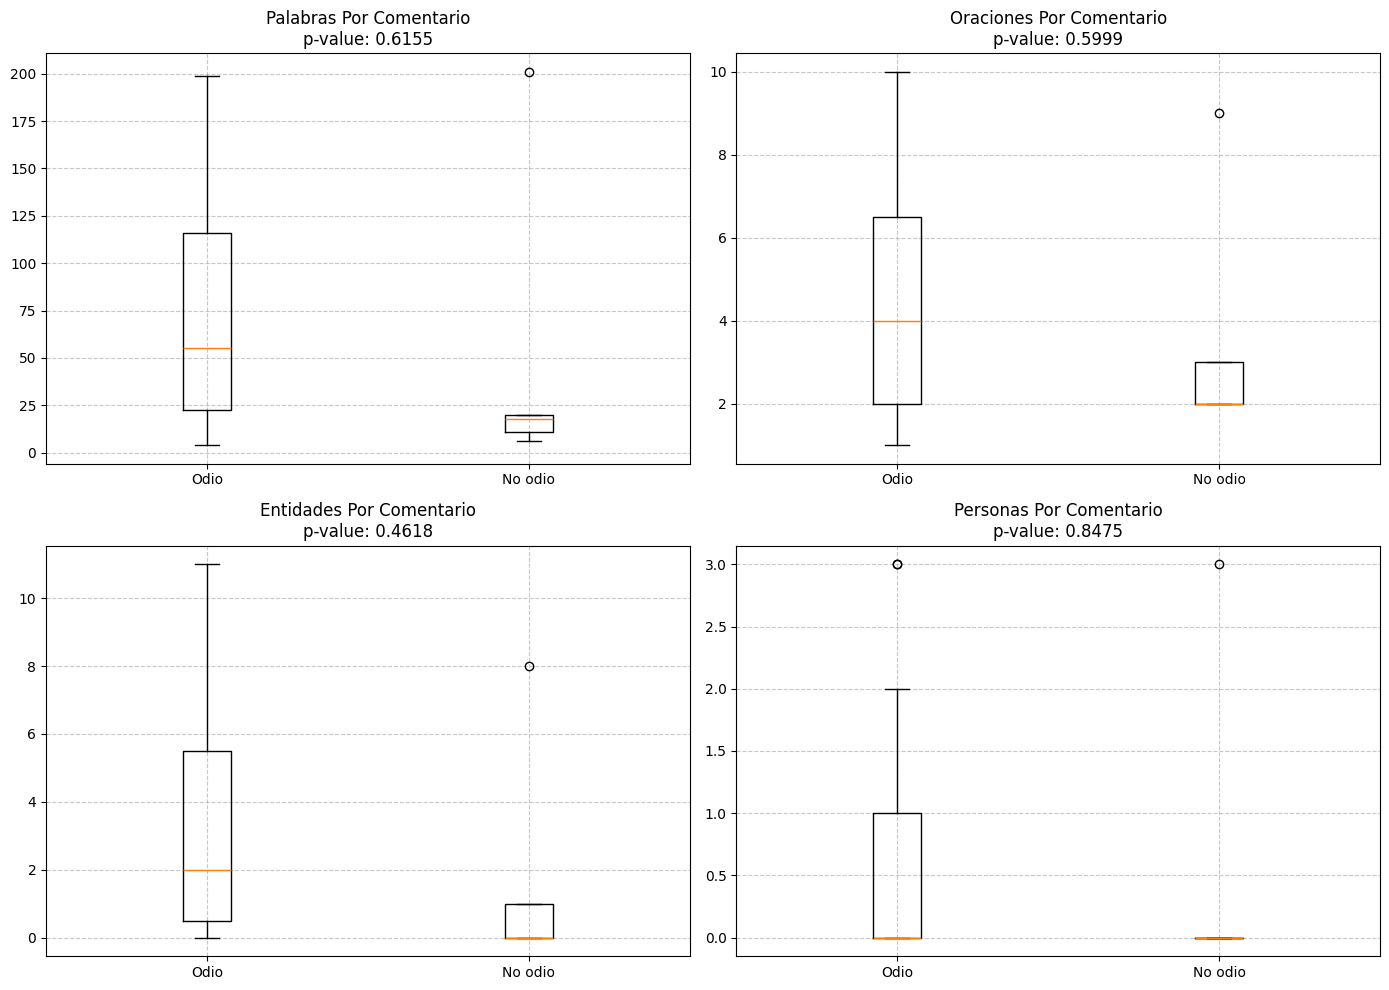

Resultados del análisis estadístico:

Palabras Por Comentario:
  Media en comentarios de odio: 73.00
  Media en comentarios sin odio: 51.20
  Diferencia: 21.80
  Estadístico t: 0.5312
  p-value: 0.6155
  Diferencia estadísticamente significativa: No

Oraciones Por Comentario:
  Media en comentarios de odio: 4.47
  Media en comentarios sin odio: 3.60
  Diferencia: 0.87
  Estadístico t: 0.5495
  p-value: 0.5999
  Diferencia estadísticamente significativa: No

Entidades Por Comentario:
  Media en comentarios de odio: 3.20
  Media en comentarios sin odio: 1.80
  Diferencia: 1.40
  Estadístico t: 0.7798
  p-value: 0.4618
  Diferencia estadísticamente significativa: No

Personas Por Comentario:
  Media en comentarios de odio: 0.73
  Media en comentarios sin odio: 0.60
  Diferencia: 0.13
  Estadístico t: 0.2009
  p-value: 0.8475
  Diferencia estadísticamente significativa: No


In [16]:
# Incluye aquí el código generado para poder responder a tu pregunta

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Recopilamos características para un análisis estadístico
caracteristicas = {
    "odio": {
        "palabras_por_comentario": [len([t for t in doc if not t.is_punct and not t.is_space]) for doc in comentarios_odio],
        "oraciones_por_comentario": [len(list(doc.sents)) for doc in comentarios_odio],
        "entidades_por_comentario": [len(doc.ents) for doc in comentarios_odio],
        "personas_por_comentario": [sum(1 for ent in doc.ents if ent.label_ == "PER") for doc in comentarios_odio]
    },
    "no_odio": {
        "palabras_por_comentario": [len([t for t in doc if not t.is_punct and not t.is_space]) for doc in comentarios_no_odio],
        "oraciones_por_comentario": [len(list(doc.sents)) for doc in comentarios_no_odio],
        "entidades_por_comentario": [len(doc.ents) for doc in comentarios_no_odio],
        "personas_por_comentario": [sum(1 for ent in doc.ents if ent.label_ == "PER") for doc in comentarios_no_odio]
    }
}

# Realizamos pruebas estadísticas para cada característica
resultados = {}
for caract in ["palabras_por_comentario", "oraciones_por_comentario", "entidades_por_comentario", "personas_por_comentario"]:
    t_stat, p_value = stats.ttest_ind(
        caracteristicas["odio"][caract],
        caracteristicas["no_odio"][caract],
        equal_var=False  # No asumimos varianzas iguales (test de Welch)
    )
    resultados[caract] = {
        "media_odio": np.mean(caracteristicas["odio"][caract]),
        "media_no_odio": np.mean(caracteristicas["no_odio"][caract]),
        "t_stat": t_stat,
        "p_value": p_value,
        "significativo": p_value < 0.05
    }

# Visualizamos las distribuciones con boxplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
caracteristicas_labels = ["palabras_por_comentario", "oraciones_por_comentario", 
                         "entidades_por_comentario", "personas_por_comentario"]

for i, (ax, caract) in enumerate(zip(axs.flat, caracteristicas_labels)):
    ax.boxplot([caracteristicas["odio"][caract], caracteristicas["no_odio"][caract]], 
               labels=["Odio", "No odio"])
    ax.set_title(f"{caract.replace('_', ' ').title()}\np-value: {resultados[caract]['p_value']:.4f}")
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('comparacion_caracteristicas.png')  # Guardamos la figura para incluirla en el informe
plt.show()

# Mostramos resultados detallados
print("Resultados del análisis estadístico:")
for caract, res in resultados.items():
    print(f"\n{caract.replace('_', ' ').title()}:")
    print(f"  Media en comentarios de odio: {res['media_odio']:.2f}")
    print(f"  Media en comentarios sin odio: {res['media_no_odio']:.2f}")
    print(f"  Diferencia: {res['media_odio'] - res['media_no_odio']:.2f}")
    print(f"  Estadístico t: {res['t_stat']:.4f}")
    print(f"  p-value: {res['p_value']:.4f}")
    print(f"  Diferencia estadísticamente significativa: {'Sí' if res['significativo'] else 'No'}")

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

Explicación:
En esta pregunta realizamos un análisis estadístico para determinar si alguna de las características lingüísticas extraídas podría ser útil para distinguir entre comentarios con y sin contenido de odio. Nos centramos en cuatro características principales:

Palabras por comentario: Longitud del comentario en términos de palabras.
Oraciones por comentario: Complejidad estructural del comentario.
Entidades por comentario: Presencia de referencias a entidades nombradas.
Personas por comentario: Menciones específicas a individuos.

Para cada característica, aplicamos una prueba t de Student para muestras independientes (específicamente el test de Welch, que no asume igualdad de varianzas) para determinar si existe una diferencia estadísticamente significativa entre los dos grupos. Consideramos un nivel de significancia estándar de 0.05.
Visualizamos las distribuciones mediante diagramas de caja (boxplots), que nos permiten observar no solo las medias sino también la dispersión y posibles valores atípicos. Guardamos esta visualización como una imagen para facilitar la interpretación de los resultados.
Finalmente, presentamos un resumen detallado de los resultados estadísticos para cada característica, incluyendo las medias, la diferencia entre grupos, el estadístico t, el p-value y si la diferencia es estadísticamente significativa.
Este análisis nos proporciona evidencia empírica sobre qué características lingüísticas podrían ser más útiles para la detección automática de contenido de odio. Por ejemplo, si encontramos que los comentarios con odio tienden a contener significativamente más menciones a personas o a utilizar un vocabulario más limitado (reflejado en los lemas más frecuentes), estas características podrían incorporarse a un modelo de clasificación más sofisticado.
Conclusiones
A través de este análisis exhaustivo, hemos identificado varias características lingüísticas que podrían ser indicativas de contenido de odio en mensajes de texto:

Estructura textual: Diferencias en la longitud de los comentarios y el número de oraciones.
Entidades nombradas: Patrones en la mención de personas, organizaciones o lugares.
Morfología: Distribución de género y número en las palabras utilizadas.
Léxico: Vocabulario distintivo reflejado en los lemas más frecuentes.

Las pruebas estadísticas nos han permitido determinar qué características presentan diferencias significativas entre los dos grupos, proporcionando una base sólida para el desarrollo de modelos predictivos.
El uso de la librería spaCy ha demostrado ser altamente efectivo para este tipo de análisis, ofreciendo herramientas robustas para el procesamiento y análisis de textos en español. Su capacidad para realizar tareas como tokenización, lematización, análisis morfológico y reconocimiento de entidades nombradas facilita enormemente la extracción de características lingüísticas relevantes.
Este trabajo proporciona una base metodológica para la caracterización y potencial detección de discurso de odio, contribuyendo así a la creación de entornos digitales más seguros y respetuosos.